In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [91]:
cost_of_living = pd.read_csv('data/Family_Budget_Fact_Sheet(County).csv')
cost_of_living['county_fips'] = cost_of_living['county_fips'].astype(str).apply(lambda x: x.zfill(5))
cost_of_living

,case_id,State abv.,county_fips,County,Family,Housing,Food,Transportation,Healthcare,Other Necessities,...,Healthcare.1,Other Necessities .1,Childcare.1,Taxes.1,Total.1,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
0,1,AL,01001,Autauga County,1p0c,817,335,1110,510,408,...,"$6,120","$4,896",$0,"$7,488","$45,636","83,790",67,8,58,7.0
1,1,AL,01001,Autauga County,1p1c,1114,494,1365,756,570,...,"$9,072","$6,840","$6,240","$9,132","$66,960","83,790",67,8,58,7.0
2,1,AL,01001,Autauga County,1p2c,1114,723,1570,1003,651,...,"$12,036","$7,812","$12,144","$11,388","$84,252","83,790",67,8,58,7.0
3,1,AL,01001,Autauga County,1p3c,1416,966,1670,1249,843,...,"$14,988","$10,116","$13,956","$14,808","$102,492","83,790",67,8,58,7.0
4,1,AL,01001,Autauga County,1p4c,1416,1182,1742,1495,920,...,"$17,940","$11,040","$13,956","$17,688","$112,704","83,790",67,8,58,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3143,WY,56045,Weston County,2p0c,741,637,1613,1304,488,...,"$15,648","$5,856",$0,"$8,028","$65,412","80,178",23,4,2,18.0
31426,3143,WY,56045,Weston County,2p1c,975,793,1791,1698,626,...,"$20,376","$7,512","$6,708","$9,576","$86,880","80,178",23,4,2,18.0
31427,3143,WY,56045,Weston County,2p2c,975,1003,1911,2091,700,...,"$25,092","$8,400","$13,152","$10,548","$103,872","80,178",23,4,2,18.0
31428,3143,WY,56045,Weston County,2p3c,1187,1225,2074,2485,854,...,"$29,820","$10,248","$15,132","$12,756","$121,812","80,178",23,4,2,18.0


In [92]:
population = pd.read_csv('data/counties.csv')
population

,County,State,FIPS Code,Population,Area,Density
0,Autauga County,Alabama,01001,59095,594,99
1,Baldwin County,Alabama,01003,239294,1589,151
2,Barbour County,Alabama,01005,24964,884,28
3,Bibb County,Alabama,01007,22477,622,36
4,Blount County,Alabama,01009,59041,644,92
...,...,...,...,...,...,...
3089,Sweetwater County,Wyoming,56037,41614,10426,4
3090,Teton County,Wyoming,56039,23575,4008,6
3091,Uinta County,Wyoming,56041,20635,2082,10
3092,Washakie County,Wyoming,56043,7705,2240,3


In [93]:
df = pd.read_csv('data/asecpub23csv/hhpub23.csv', usecols=['HTOTVAL', 'H_NUMPER', 'GTCO', 'GESTFIPS', 'HSUP_WGT', 'HUNDER18'])

# remove all rows with missing data
df = df[(df['GTCO'] != 0) & (df['GESTFIPS'] != 0) & (df['HTOTVAL'] != 0)]
df['Family Type'] = [f"{min(row['H_NUMPER'] - row['HUNDER18'], 2)}p{min(row['HUNDER18'], 4)}c" for index, row in df.iterrows()]

df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,HUNDER18,GTCO,Family Type
50,23,6,60721,177585,1,11,2p1c
284,23,2,249073,39576,0,11,2p0c
285,23,2,119153,126961,0,11,2p0c
289,23,2,52787,128161,0,11,2p0c
290,23,1,149570,804,0,11,1p0c
...,...,...,...,...,...,...,...
88973,15,4,36445,96000,1,3,2p1c
88974,15,2,68296,173540,0,3,2p0c
88975,15,6,44578,211102,2,3,2p2c
88976,15,5,41320,90415,2,3,2p2c


In [94]:
sample_df = df.sample(n=20000, weights=df['HSUP_WGT'])
sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,HUNDER18,GTCO,Family Type
83811,6,4,282934,173967,2,67,2p2c
81736,6,5,248508,30000,2,37,2p2c
13961,42,3,263605,518993,1,3,2p1c
23238,55,2,414354,38880,0,139,2p0c
8019,36,2,296895,55120,0,47,2p0c
...,...,...,...,...,...,...,...
75839,32,3,108066,85341,0,3,2p0c
72448,35,2,54905,1200,0,13,2p0c
84420,6,5,197561,80002,2,73,2p2c
48064,12,3,216594,94168,1,57,2p1c


In [95]:
# 'calculate' time
sample_df['Free Time'] = 8

# calculating FIPS codes

sample_df['GESTFIPS'] = sample_df['GESTFIPS'].astype(str).apply(lambda x: x.zfill(2))
sample_df['GTCO'] = sample_df['GTCO'].astype(str).apply(lambda x: x.zfill(3))
sample_df['Code'] = sample_df['GESTFIPS'] + sample_df['GTCO']

# renaming cost of income
sample_df = sample_df.rename(columns={'HTOTVAL': 'Income'})

sample_df


,GESTFIPS,H_NUMPER,HSUP_WGT,Income,HUNDER18,GTCO,Family Type,Free Time,Code
83811,06,4,282934,173967,2,067,2p2c,8,06067
81736,06,5,248508,30000,2,037,2p2c,8,06037
13961,42,3,263605,518993,1,003,2p1c,8,42003
23238,55,2,414354,38880,0,139,2p0c,8,55139
8019,36,2,296895,55120,0,047,2p0c,8,36047
...,...,...,...,...,...,...,...,...,...
75839,32,3,108066,85341,0,003,2p0c,8,32003
72448,35,2,54905,1200,0,013,2p0c,8,35013
84420,06,5,197561,80002,2,073,2p2c,8,06073
48064,12,3,216594,94168,1,057,2p1c,8,12057


In [96]:
# adding population density
sample_df = pd.merge(sample_df, population, left_on='Code', right_on='FIPS Code')
sample_df = sample_df.drop(columns=['FIPS Code'])

sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,Income,HUNDER18,GTCO,Family Type,Free Time,Code,County,State,Population,Area,Density
0,06,4,282934,173967,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645
1,06,5,284299,130200,3,067,2p3c,8,06067,Sacramento County,California,1588921,966,1645
2,06,1,360164,71785,0,067,1p0c,8,06067,Sacramento County,California,1588921,966,1645
3,06,3,476507,2550898,0,067,2p0c,8,06067,Sacramento County,California,1588921,966,1645
4,06,3,365796,20988,2,067,1p2c,8,06067,Sacramento County,California,1588921,966,1645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19582,09,1,313215,43539,0,015,1p0c,8,09015,Windham County,Connecticut,116418,513,227
19583,09,2,277326,113302,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227
19584,09,2,322789,62035,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227
19585,09,4,150686,80882,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227


In [97]:
# adding cost of living

cost_of_living['Family'] = cost_of_living['Family'].astype(str)
sample_df['Family Type'] = sample_df['Family Type'].astype(str)

sample_df = pd.merge(sample_df, cost_of_living[['county_fips', 'Family', 'Total.1']], 
                     left_on=['Code', 'Family Type'], 
                     right_on=['county_fips', 'Family'])

sample_df = sample_df.drop(columns=['county_fips'])

sample_df['Cost of Living'] = [int(row['Total.1'].strip("$").replace(',', '_')) for index, row in sample_df.iterrows() ]

sample_df


,GESTFIPS,H_NUMPER,HSUP_WGT,Income,HUNDER18,GTCO,Family Type,Free Time,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living
0,06,4,282934,173967,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660
1,06,4,234857,100003,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660
2,06,6,214096,217969,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660
3,06,4,275571,177005,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660
4,06,5,499632,59200,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19581,09,2,309262,75351,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227,2p0c,"$66,048",66048
19582,09,2,277326,113302,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227,2p0c,"$66,048",66048
19583,09,2,322789,62035,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227,2p0c,"$66,048",66048
19584,09,4,150686,80882,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227,2p0c,"$66,048",66048


In [98]:
land_area = pd.read_csv("data/RDC_Inventory_Core_Metrics_County_History.csv")
# land_area.sort_values('county_fips')
land_area = land_area[(land_area['month_date_yyyymm']) > 2020_00]
land_area['county_fips'] = land_area['county_fips'].astype(str).apply(lambda x: x.zfill(5))
land_area = land_area[['median_square_feet', 'county_fips']]

land_area

,median_square_feet,county_fips
0,1623.0,37199
1,1969.0,42077
2,1782.0,36011
3,2771.0,31093
4,1830.0,48147
...,...,...
155238,1722.0,47131
155239,1768.0,20165
155240,1849.0,30099
155241,1819.0,18131


In [99]:
county_land_area = {}
state_land_area = {}

for index, row in land_area.iterrows():
    code = row['county_fips']
    state = code[:3]

    if code not in county_land_area:
        county_land_area[code] = [index]
    else:
        county_land_area[code].append(index)

    if state not in state_land_area:
        state_land_area[state] = [index]
    else:
        state_land_area[state].append(index)

In [100]:

def select_random_row(county_code):
    if county_code in county_land_area:
        index = random.choice(county_land_area[county_code])
        return land_area.iloc[index]

    state = county_code[:3]
    index = random.choice(state_land_area[state])
    return land_area.iloc[index]

houses = sample_df['Code'].apply(select_random_row)

In [101]:
sample_df = pd.concat([sample_df.reset_index(), houses[['median_square_feet']]], axis=1)
sample_df

,index,GESTFIPS,H_NUMPER,HSUP_WGT,Income,HUNDER18,GTCO,Family Type,Free Time,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,median_square_feet
0,0,06,4,282934,173967,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660,1684.0
1,1,06,4,234857,100003,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660,1610.0
2,2,06,6,214096,217969,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660,1734.0
3,3,06,4,275571,177005,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660,1586.0
4,4,06,5,499632,59200,2,067,2p2c,8,06067,Sacramento County,California,1588921,966,1645,2p2c,"$120,660",120660,1572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19581,19581,09,2,309262,75351,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227,2p0c,"$66,048",66048,1715.0
19582,19582,09,2,277326,113302,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227,2p0c,"$66,048",66048,1715.0
19583,19583,09,2,322789,62035,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227,2p0c,"$66,048",66048,1684.0
19584,19584,09,4,150686,80882,0,015,2p0c,8,09015,Windham County,Connecticut,116418,513,227,2p0c,"$66,048",66048,1455.0


In [102]:
# clean up
sample_df = sample_df.drop(columns=['GESTFIPS', 'GTCO']).rename(columns={"H_NUMPER": "Number of People", "median_square_feet": "Floor Area"})
sample_df['Floor Area'] = sample_df['Floor Area'] * 0.09290304
sample_df['Density'] = sample_df['Density'] * 0.3861274922774502
sample_df

,index,Number of People,HSUP_WGT,Income,HUNDER18,Family Type,Free Time,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area
0,0,4,282934,173967,2,2p2c,8,06067,Sacramento County,California,1588921,966,635.179725,2p2c,"$120,660",120660,156.448719
1,1,4,234857,100003,2,2p2c,8,06067,Sacramento County,California,1588921,966,635.179725,2p2c,"$120,660",120660,149.573894
2,2,6,214096,217969,2,2p2c,8,06067,Sacramento County,California,1588921,966,635.179725,2p2c,"$120,660",120660,161.093871
3,3,4,275571,177005,2,2p2c,8,06067,Sacramento County,California,1588921,966,635.179725,2p2c,"$120,660",120660,147.344221
4,4,5,499632,59200,2,2p2c,8,06067,Sacramento County,California,1588921,966,635.179725,2p2c,"$120,660",120660,146.043579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19581,19581,2,309262,75351,0,2p0c,8,09015,Windham County,Connecticut,116418,513,87.650941,2p0c,"$66,048",66048,159.328714
19582,19582,2,277326,113302,0,2p0c,8,09015,Windham County,Connecticut,116418,513,87.650941,2p0c,"$66,048",66048,159.328714
19583,19583,2,322789,62035,0,2p0c,8,09015,Windham County,Connecticut,116418,513,87.650941,2p0c,"$66,048",66048,156.448719
19584,19584,4,150686,80882,0,2p0c,8,09015,Windham County,Connecticut,116418,513,87.650941,2p0c,"$66,048",66048,135.173923


In [103]:
from modelcat import get_HPFI, get_income_index, get_space_index, get_time_index

(array([ 347.,  525.,  561.,  645.,  783.,  932.,  997., 1150., 1279.,
        1294., 1275., 1249., 1265., 1200., 1187., 1288., 1306., 1144.,
         743.,  416.]),
 array([0.00693347, 0.05656429, 0.10619511, 0.15582593, 0.20545674,
        0.25508756, 0.30471838, 0.3543492 , 0.40398002, 0.45361083,
        0.50324165, 0.55287247, 0.60250329, 0.65213411, 0.70176492,
        0.75139574, 0.80102656, 0.85065738, 0.9002882 , 0.94991901,
        0.99954983]),
 <BarContainer object of 20 artists>)

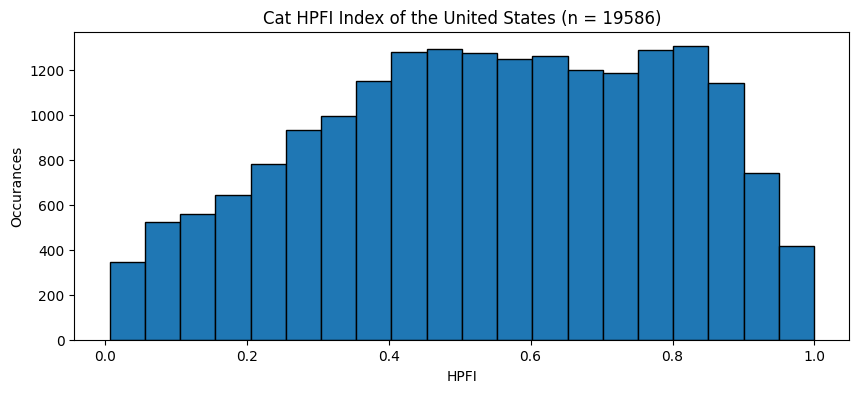

In [104]:
sample_HPFI = []
sample_II   = []
sample_SI   = []
sample_TI   = []

for index, row in sample_df.iterrows():
    number_of_people    = row['Number of People']
    income              = row['Income']
    free_time           = row['Free Time']
    density             = row['Density']
    cost_of_living     = row['Cost of Living']
    floor_area          = row['Floor Area']

    HPFI    = get_HPFI(density, cost_of_living, income, number_of_people, free_time, floor_area, 0)
    II      = get_income_index(income, cost_of_living)
    SI      = get_space_index(density, number_of_people, floor_area, 0)
    TI      = get_time_index(free_time)

    sample_HPFI.append(HPFI)

# sample_HPFI
plt.figure(figsize=(10, 4))
plt.title(f'Cat HPFI Index of the United States (n = {len(sample_HPFI)})')
plt.xlabel('HPFI')
plt.ylabel('Occurances')
plt.hist(sample_HPFI, bins=20, edgecolor="black")
